In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler



df_train = pd.read_csv('train.csv', encoding = "ISO-8859-1")
df_test = pd.read_csv('test.csv', encoding = "ISO-8859-1")

float_cols = [c for c in df_train if df_train[c].dtype == "float64"]
float32_cols = {c: np.float32 for c in float_cols}

df_train = pd.read_csv('train.csv', encoding = "ISO-8859-1", dtype=float32_cols)
# df_test is not used in this code example


list_to_remove = ['balance_due',
 'collection_status',
 'compliance_detail',
 'payment_amount',
 'payment_date',
 'payment_status']

list_to_remove_all = ['admin_fee', 'state_fee', 'clean_up_cost',
                      'violator_name', 'zip_code', 'country', 'city', 'state',
                      'inspector_name', 'violation_street_number', 'violation_street_name',
                      'violation_zip_code', 'violation_description',
                      'mailing_address_str_number', 'mailing_address_str_name',
                      'non_us_str_code',
                      'ticket_issued_date', 'hearing_date']

df_train.drop(list_to_remove, axis=1, inplace=True)
df_train.drop(list_to_remove_all, axis=1, inplace=True)
df_test.drop(list_to_remove_all, axis=1, inplace=True)

df_train.drop('grafitti_status', axis=1, inplace=True)
df_test.drop('grafitti_status', axis=1, inplace=True)

###
df_latlons = pd.read_csv('latlons.csv')
df_address =  pd.read_csv('addresses.csv')
df_id_latlons = df_address.set_index('address').join(df_latlons.set_index('address'))

df_train = df_train.set_index('ticket_id').join(df_id_latlons.set_index('ticket_id'))
df_test = df_test.set_index('ticket_id').join(df_id_latlons.set_index('ticket_id'))

###
vio_code_freq10 = df_train.violation_code.value_counts().index[0:10]
df_train['violation_code_freq10'] = [list(vio_code_freq10).index(c) if c in vio_code_freq10 else -1 for c in df_train.violation_code ]
df_train.drop('violation_code', axis=1, inplace=True)
df_test['violation_code_freq10'] = [list(vio_code_freq10).index(c) if c in vio_code_freq10 else -1 for c in df_test.violation_code ]
df_test.drop('violation_code', axis=1, inplace=True)

###
df_train = df_train[df_train.compliance.isnull() == False]

df_train.lat.fillna(method='pad', inplace=True)
df_train.lon.fillna(method='pad', inplace=True)
#df_train.state.fillna(method='pad', inplace=True)

df_test.lat.fillna(method='pad', inplace=True)
df_test.lon.fillna(method='pad', inplace=True)
#df_test.state.fillna(method='pad', inplace=True)

one_hot_encode_columns = ['agency_name', 'disposition', 'violation_code_freq10']


df_train = pd.get_dummies(df_train, columns=one_hot_encode_columns)
df_test = pd.get_dummies(df_test, columns=one_hot_encode_columns)


###

train_features = df_train.columns.drop('compliance')

#######
X_train = df_train[train_features]
y_train = df_train.compliance

X_train, X_test, y_train, y_test= train_test_split(X_train, 
                                                    y_train, 
                                                    random_state=0,
                                                    test_size=0.2)

#######

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/fuyang/Workspace/coursera-Applied-Machine-Learning-in-Python/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_train.columns

Index(['fine_amount', 'late_fee', 'discount_amount', 'judgment_amount',
       'compliance', 'lat', 'lon',
       'agency_name_Buildings, Safety Engineering & Env Department',
       'agency_name_Department of Public Works',
       'agency_name_Detroit Police Department',
       'agency_name_Health Department', 'agency_name_Neighborhood City Halls',
       'disposition_Responsible (Fine Waived) by Deter',
       'disposition_Responsible by Admission',
       'disposition_Responsible by Default',
       'disposition_Responsible by Determination', 'violation_code_freq10_-1',
       'violation_code_freq10_0', 'violation_code_freq10_1',
       'violation_code_freq10_2', 'violation_code_freq10_3',
       'violation_code_freq10_4', 'violation_code_freq10_5',
       'violation_code_freq10_6', 'violation_code_freq10_7',
       'violation_code_freq10_8', 'violation_code_freq10_9'],
      dtype='object')

In [3]:
import torch
from torch.autograd import Variable
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

In [4]:
y_train.dtype

dtype('float32')

In [5]:
x_tensor = torch.from_numpy(X_train_scaled.astype(np.float32))
y_tensor = torch.from_numpy(y_train.as_matrix().astype(np.int64))

test_x = torch.from_numpy(X_test_scaled.astype(np.float32))
test_y = torch.from_numpy(y_test.as_matrix().astype(np.int64))

In [6]:
x_tensor


 0.0100  0.0100  0.0000  ...   1.0000  0.0000  0.0000
 0.0250  0.0250  0.0000  ...   0.0000  0.0000  0.0000
 0.0050  0.0050  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0200  0.0200  0.0000  ...   0.0000  0.0000  0.0000
 0.0250  0.0250  0.0000  ...   0.0000  0.0000  0.0000
 0.0250  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatTensor of size 127904x26]

In [7]:
y_tensor


 0
 0
 0
⋮ 
 0
 0
 0
[torch.LongTensor of size 127904]

In [8]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [11]:
BATCH_SIZE=400

torch_dataset = Data.TensorDataset(data_tensor=x_tensor, target_tensor=y_tensor)
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

In [32]:
EPOCH = 5

net = Net(n_feature=26, n_hidden=100, n_output=2) 
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = net(b_x)               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output = net(Variable(test_x))
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)



Epoch:  0 | train loss: 0.5933 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2154 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2006 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2203 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2296 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2425 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1790 | test accuracy: 0.93
Epoch:  1 | train loss: 0.2590 | test accuracy: 0.93
Epoch:  1 | train loss: 0.1962 | test accuracy: 0.93
Epoch:  1 | train loss: 0.2178 | test accuracy: 0.93
Epoch:  1 | train loss: 0.2115 | test accuracy: 0.93
Epoch:  1 | train loss: 0.1871 | test accuracy: 0.93
Epoch:  1 | train loss: 0.2300 | test accuracy: 0.94
Epoch:  1 | train loss: 0.2201 | test accuracy: 0.94
Epoch:  2 | train loss: 0.1609 | test accuracy: 0.94
Epoch:  2 | train loss: 0.1931 | test accuracy: 0.93
Epoch:  2 | train loss: 0.2128 | test accuracy: 0.93
Epoch:  2 | train loss: 0.2102 | test accuracy: 0.93
Epoch:  2 | train loss: 0.2304 | test accuracy

In [33]:
from sklearn.metrics import recall_score, precision_score, f1_score

test_output = net(Variable(x_tensor))
train_pred = torch.max(test_output, 1)[1].data.numpy().squeeze()

print(precision_score(y_train, train_pred),
      recall_score(y_train, train_pred),
      f1_score(y_train, train_pred))

0.826630920465 0.2 0.322075208914


In [34]:
test_output = net(Variable(test_x))
test_pred = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(precision_score(y_test, test_pred),
      recall_score(y_test, test_pred),
      f1_score(y_test, test_pred))

0.820224719101 0.186621218577 0.304061089899


<IPython.core.display.Javascript object>


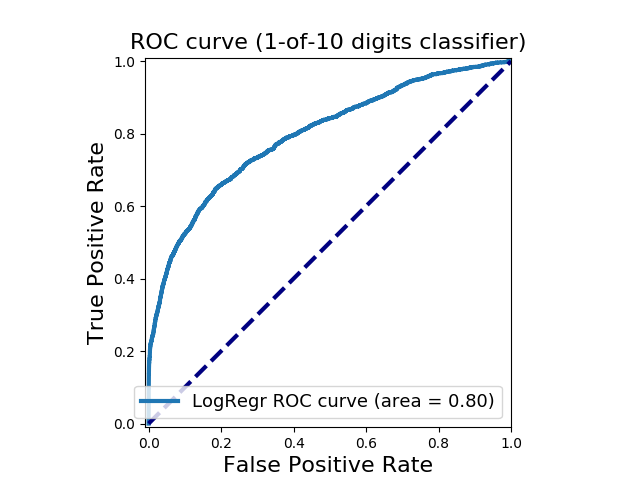

In [35]:
test_pro = F.softmax(test_output)

def draw_roc_curve():
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    fpr_lr, tpr_lr, _ = roc_curve(y_test, test_pro[:,1].data.numpy())
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    
draw_roc_curve()